In [1]:
import math
import numpy as np
import pandas as pd
from read_data_file import *
from util import *
from train_model import *

file_name = "/Users/fahimtajwar/Academics/CS229A/Project/data/fdadatafinal.xlsx"
dataset_reader = Dataset_Reader(file_name, "excel")
dataset_divider = Dataset_Divider(dataset_reader)

In [2]:
print(dataset_divider.total_dataset.get_number_of_datapoints())
print(dataset_divider.training_dataset.get_number_of_datapoints())

print(dataset_divider.get_total_dataset().class_distribution)

8079
4847
{0: 1393, 1: 5850, 2: 836}


In [3]:
training_dataset = dataset_divider.get_training_dataset()

X_train = training_dataset.get_X()
y_train = training_dataset.get_y()
indices = [4]
X_train = X_train[:, indices]
print(X_train.shape)
print(y_train.shape)

training_dataset_1 = Dataset(X_train, y_train)
model = Linear_Model("svm", training_dataset_1)

(4847, 1)
(4847,)


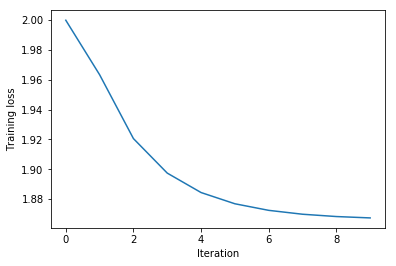

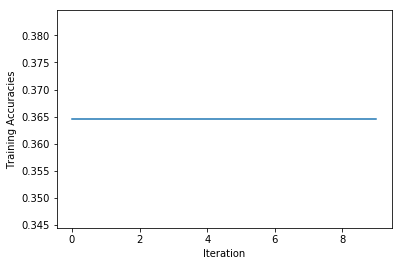

0.3645553950897462
0.0
{0: 1.0, 1: 0.26079545454545455, 2: 0.0}


In [4]:
average_loss_history, train_accuracies, per_class  = model.train(learning_rate = 5e-2, reg = 0.2, num_epochs = 100, 
                                   batch_size = "all", num_average = 10, decay = 0.95)
show_plot(average_loss_history, x_title = "Iteration", y_title = "Training loss")
show_plot(train_accuracies, x_title = "Iteration", y_title = "Training Accuracies")
print(max(train_accuracies))
print(max(train_accuracies) - min(train_accuracies))
print(per_class)

In [5]:
print(train_accuracies)

[0.3645553950897462, 0.3645553950897462, 0.3645553950897462, 0.3645553950897462, 0.3645553950897462, 0.3645553950897462, 0.3645553950897462, 0.3645553950897462, 0.3645553950897462, 0.3645553950897462]


In [6]:
print(training_dataset.get_class_distribution())

{0: 849, 1: 3520, 2: 478}


In [7]:
even_dataset_split = Balanced_Class_Dataset_Divider(dataset_reader)
training_dataset = even_dataset_split.get_training_dataset()
validation_dataset = even_dataset_split.get_validation_dataset()
test_dataset = even_dataset_split.get_test_dataset()

print(training_dataset.get_class_distribution())
print(validation_dataset.get_class_distribution())
print(test_dataset.get_class_distribution())

{0: 514, 1: 503, 2: 487}
{0: 164, 1: 177, 2: 160}
{0: 157, 1: 155, 2: 189}


In [8]:
X_train = training_dataset.get_X()
y_train = training_dataset.get_y()
X_train = X_train[:, indices]
print(X_train.shape)
print(y_train.shape)

training_dataset = Dataset(X_train, y_train)
model = Linear_Model("svm", training_dataset)

(1504, 1)
(1504,)


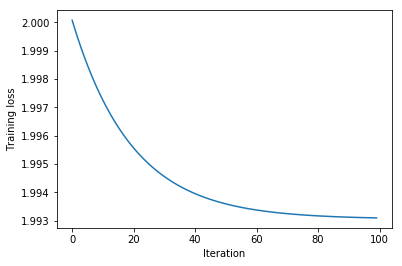

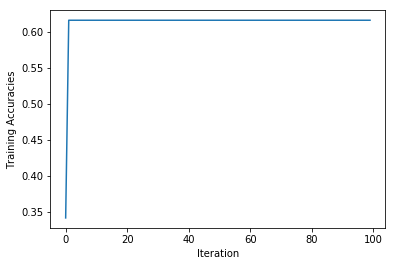

0.6156914893617021
0.273936170212766
{0: 1.0, 1: 0.0, 2: 0.8459958932238193}


In [9]:
average_loss_history, train_accuracies, per_class  = model.train(learning_rate = 1e-3, reg = 0.2, num_epochs = 100, 
                                   batch_size = "all", num_average = 1, decay = 0.95)
show_plot(average_loss_history, x_title = "Iteration", y_title = "Training loss")
show_plot(train_accuracies, x_title = "Iteration", y_title = "Training Accuracies")
print(max(train_accuracies))
print(max(train_accuracies) - min(train_accuracies))
print(per_class)

In [10]:
print(train_accuracies[len(train_accuracies) - 1])

0.6156914893617021


In [11]:
print(model.get_accuracy(training_dataset_1.get_X(), training_dataset_1.get_y()))

0.2587167319991747


In [12]:
print(model.get_per_class_accuracy(training_dataset_1.get_X(), training_dataset_1.get_y()))

{0: 1.0, 1: 0.0, 2: 0.8472803347280334}


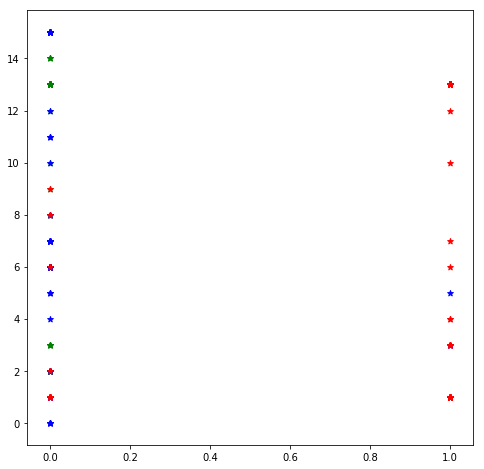

In [13]:
visualize_dataset(even_dataset_split.get_separated_dataset(), 100, 4, 3)